# Analyzing The Background and In Cell Fluorescence Intensities for the datasets from omnipose output

# Macro Analysis Comparing Cell and Background Intensities with Per Frame data Across Experiments (segmented by omnipose or pretrained ML)


This Script is intended to be used quickly following imaging to assess overall data collection methods. The data must first be segmented using the omnipose script with naming and folder structurs and then 



In [1]:
import pandas as pd

# Load the datasets
df_biorep1 = pd.read_csv(r"C:\Users\mattt\Documents\mutants\df.csv")
#df_biorep2 = pd.read_csv(r"C:\Users\mattt\Documents\Omni\image_post_omni_biorep2_curated\df_biorep2.csv")



# Combine both datasets
#combined_df = pd.concat([df_biorep1, df_biorep2], ignore_index=True)
combined_df = df_biorep1

# Displaying basic information about the dataset
basic_info = combined_df.info()

# Displaying the first few rows to understand the structure of the data
first_few_rows = combined_df.head()

# Displaying unique values for key columns to understand their distribution
unique_values = {
    column: combined_df[column].unique() for column in combined_df.columns
}

basic_info, first_few_rows, unique_values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26667 entries, 0 to 26666
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           26667 non-null  float64
 1   median         26667 non-null  float64
 2   max            26667 non-null  int64  
 3   min            26667 non-null  int64  
 4   std_dev        26667 non-null  float64
 5   skewness       26667 non-null  float64
 6   kurtosis       26667 non-null  float64
 7   pixel_count    26667 non-null  int64  
 8   area_covered   26667 non-null  float64
 9   full_filepath  26667 non-null  object 
 10  frame          26667 non-null  int64  
 11  z_stack        26667 non-null  object 
 12  channel        26667 non-null  int64  
 13  condition      26667 non-null  object 
 14  time           26667 non-null  object 
 15  strain         26667 non-null  object 
 16  image_type     26667 non-null  object 
 17  biorep         26667 non-null  int64  
 18  signal

(None,
           mean  median    max   min     std_dev  skewness  kurtosis  \
 0   931.619010   925.0   2938   585  102.513911  0.623455  3.627348   
 1   982.262970   976.0   1597   596  107.856363  0.345948  0.177546   
 2  4681.323827  4599.0  13487  2706  681.038004  1.704714  9.463394   
 3   925.748429   920.0   3579   598  101.256611  0.690931  5.720718   
 4   969.281303   963.0   1637   601  106.321071  0.346015  0.193220   
 
    pixel_count  area_covered  \
 0       259923      0.991528   
 1       259923      0.991528   
 2       259923      0.991528   
 3       259923      0.991528   
 4       259923      0.991528   
 
                                        full_filepath  frame  z_stack  channel  \
 0  C:\Users\mattt\Documents\mutants\biorep0\LZ222...      0  Channel        0   
 1  C:\Users\mattt\Documents\mutants\biorep0\LZ222...      0  Channel        1   
 2  C:\Users\mattt\Documents\mutants\biorep0\LZ222...      0  Channel        2   
 3  C:\Users\mattt\Documents\mu

In [2]:

# Filter for the FISH signal only
fish_signal_df = combined_df[combined_df['signal'] == 'fish']

# Focusing on rows where image_type is 'background'
background_data = fish_signal_df[fish_signal_df['image_type'] == 'background']

# Selecting only numeric columns for aggregation
numeric_columns = ['mean', 'median', 'max', 'min', 'std_dev']

# Grouping the data by strain, time, and bioreplicate and aggregating only the numeric columns
grouped_background_data = background_data.groupby(['strain', 'time', 'biorep'])[numeric_columns].agg(['mean', 'median', 'std'])

# Display the grouped data for analysis
grouped_background_data.head()


mean                                median  \
                             mean       median         std         mean   
strain  time  biorep                                                      
LZ22225 0min  0       1097.014651   922.069595  202.942641  1090.379070   
              1        814.155093   813.630635    4.405043   807.925000   
              2        801.908930   802.084183    3.316030   796.035294   
        10min 0       1302.737585  1288.748567   71.904766  1289.825000   
              1        806.632611   806.403926    4.866344   800.666667   

                                                  max                        \
                      median         std         mean  median           std   
strain  time  biorep                                                          
LZ22225 0min  0        914.0  202.863316  2376.539535  2138.0   1040.138815   
              1        807.5    4.196970  1845.175000  1745.0    467.724786   
              2        796.0    3.336119  1311.917647  1297.0     69.805719   
        10min 0       1280.0   57.125719  7016.112500  3221.5  10141.179069   
              1        800.0    4.850576  1354.044444  1327.5     92.195190   

                             min                       std_dev              \
                            mean median        std        mean      median   
strain  time  biorep                                                         
LZ22225 0min  0       663.632558  593.0  96.828058  121.696259  107.635555   
              1       543.962500  545.0   9.843643   83.446222   83.043009   
              2       539.164706  542.0   9.805061   79.873679   79.827204   
        10min 0       752.992500  752.0  36.344184  174.435034  147.730839   
              1       542.244444  544.0  11.078181   80.983352   80.860740   

                                 
                            std  
strain  time  biorep             
LZ22225 0min  0       24.513841  
              1        2.527491  
              2        0.594306  
        10min 0       94.804180  
              1        1.075551

## Basing it on overall Experiment (Not Grouping based on condition)

C:\Users\mattt\AppData\Local\Temp\ipykernel_29444\12944117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)


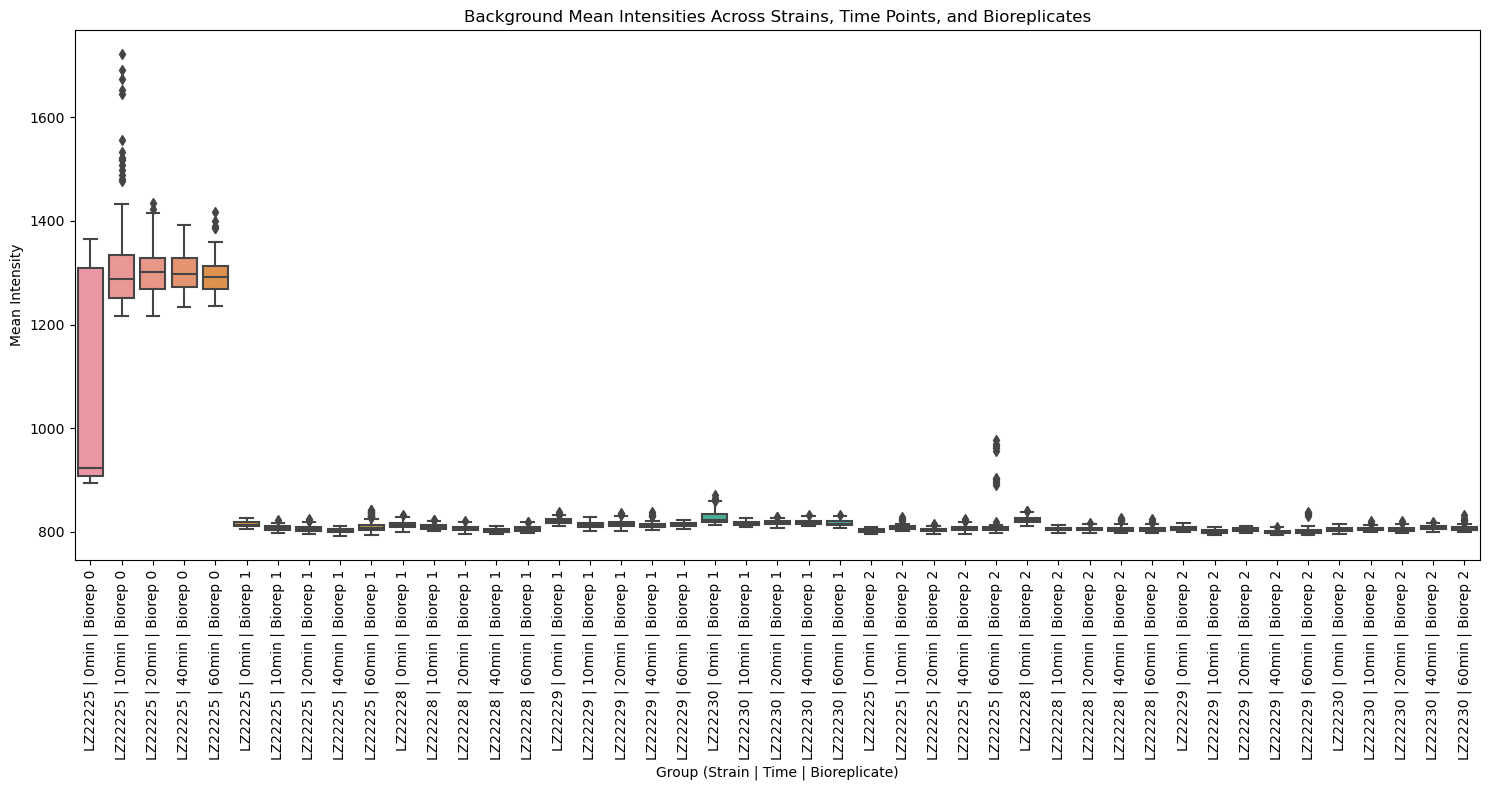

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for visualization
# Create a new column that combines strain, time, and bioreplicate for easier plotting
background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str)

# Plotting background mean intensities for each group
plt.figure(figsize=(15, 8))
sns.boxplot(x='group', y='mean', data=background_data)
plt.xticks(rotation=90)
plt.title('Background Mean Intensities Across Strains, Time Points, and Bioreplicates')
plt.xlabel('Group (Strain | Time | Bioreplicate)')
plt.ylabel('Mean Intensity')
plt.tight_layout()  # To ensure the layout fits well in the output cell
plt.show()



C:\Users\mattt\AppData\Local\Temp\ipykernel_29444\3488894401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str) + ' | ' + background_data['condition']


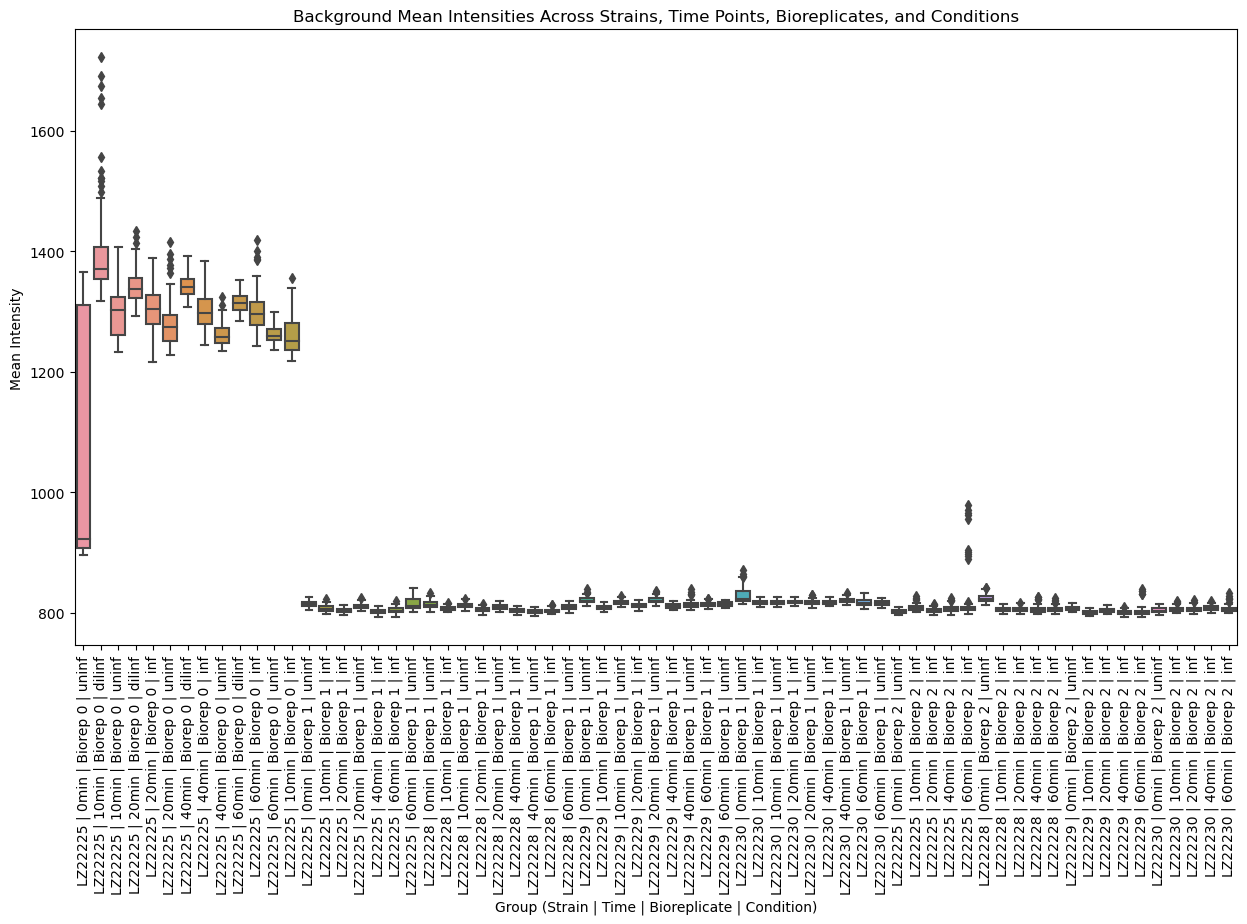

In [4]:


# Preparing the data for visualization
# Create a new column that combines strain, time, bioreplicate, and condition for easier plotting
background_data['group'] = background_data['strain'] + ' | ' + background_data['time'] + ' | ' + 'Biorep ' + background_data['biorep'].astype(str) + ' | ' + background_data['condition']

# Plotting background mean intensities for each group
plt.figure(figsize=(15, 8))
sns.boxplot(x='group', y='mean', data=background_data)
plt.xticks(rotation=90)
plt.title('Background Mean Intensities Across Strains, Time Points, Bioreplicates, and Conditions')
plt.xlabel('Group (Strain | Time | Bioreplicate | Condition)')
plt.ylabel('Mean Intensity')
plt.show()


#### Now plotting grouped by Zstack to see if theres a trend or explanation 

TypeError: 'Axes' object is not subscriptable

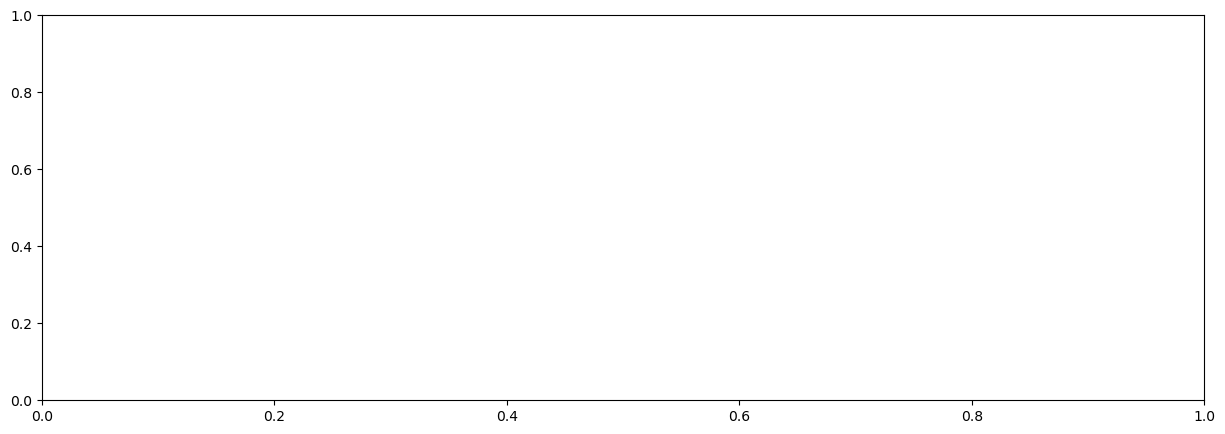

In [5]:
# Creating separate plots for each Z-stack
z_stacks = background_data['z_stack'].unique()

# Setting up the figure for multiple subplots
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Plot
    sns.boxplot(x='group', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


## Looking at differences in infected vs uninfected with the experiment 

C:\Users\Nikon\AppData\Local\Temp\ipykernel_19324\3135339275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype

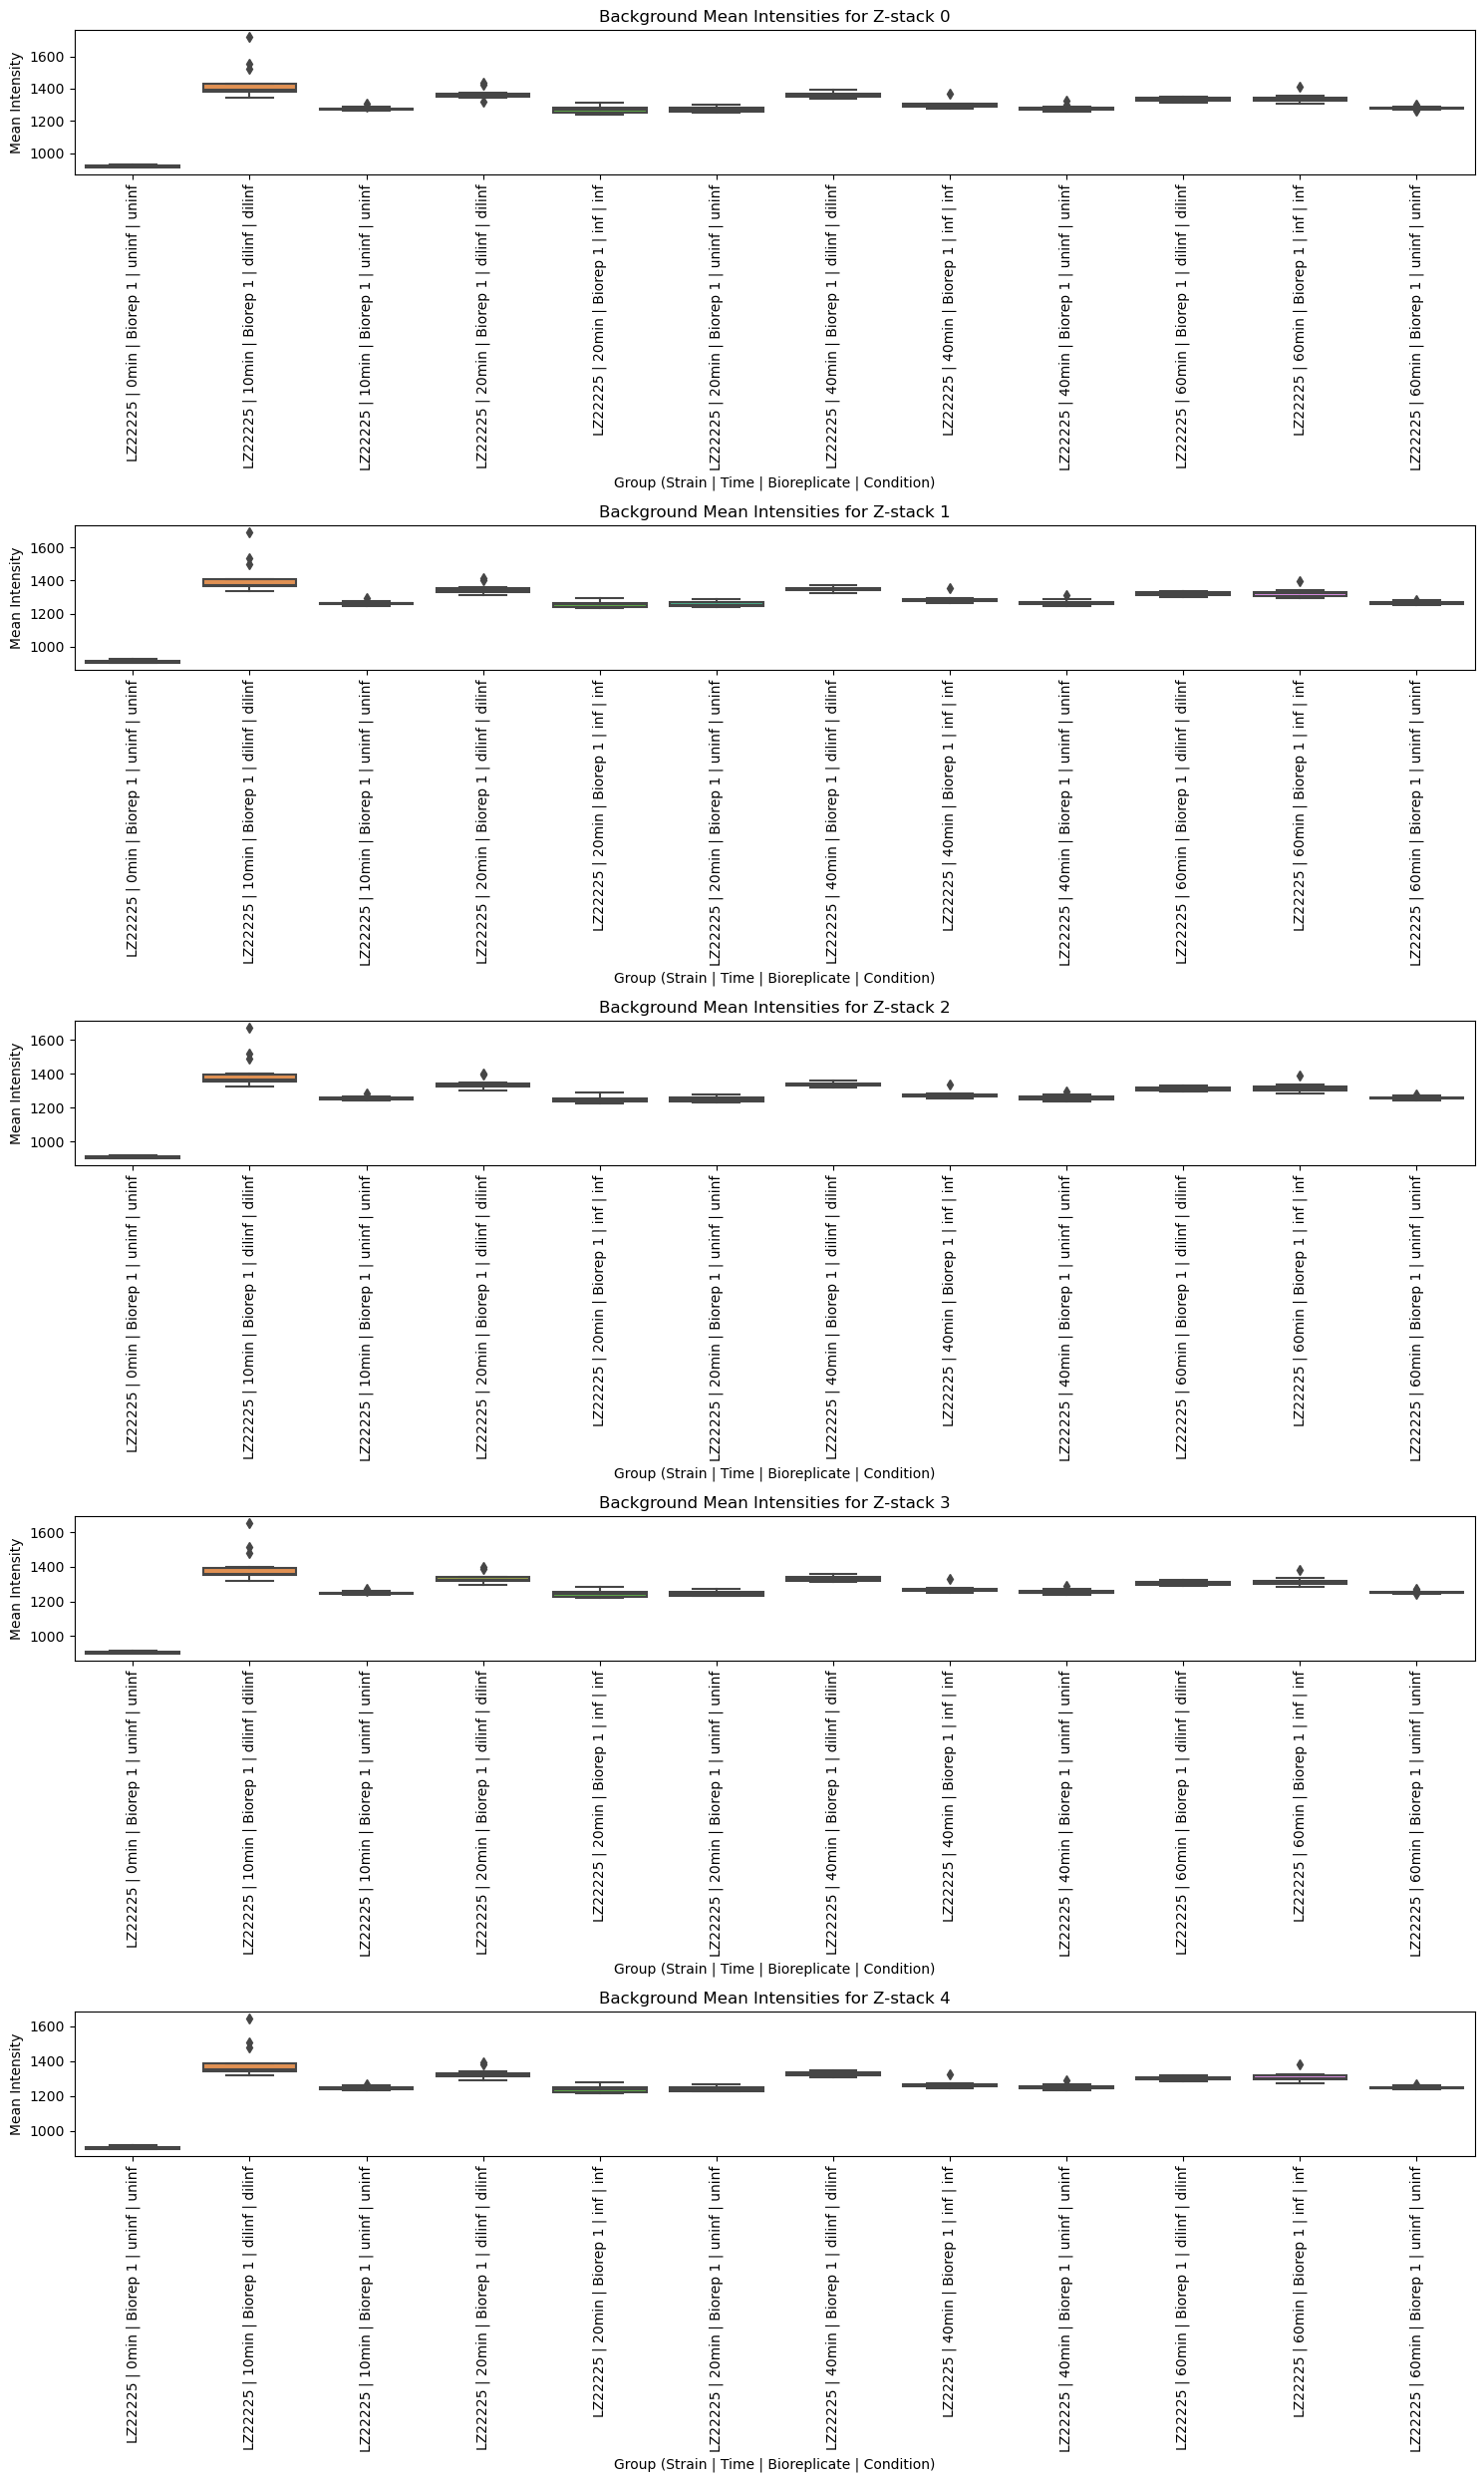

In [ ]:
# Creating separate plots for each Z-stack, now also grouped by condition
fig, axes = plt.subplots(len(z_stacks), 1, figsize=(15, 5 * len(z_stacks)))

# Looping through each Z-stack to create a plot, now considering 'condition'
for i, z_stack in enumerate(z_stacks):
    # Filter data for the current Z-stack
    data_for_z_stack = background_data[background_data['z_stack'] == z_stack]

    # Grouping based on condition as well
    data_for_z_stack['group_condition'] = data_for_z_stack['group'] + ' | ' + data_for_z_stack['condition']

    # Plot
    sns.boxplot(x='group_condition', y='mean', data=data_for_z_stack, ax=axes[i])
    axes[i].set_title(f'Background Mean Intensities for Z-stack {z_stack}')
    axes[i].set_xlabel('Group (Strain | Time | Bioreplicate | Condition)')
    axes[i].set_ylabel('Mean Intensity')
    axes[i].tick_params(axis='x', rotation=90)

# Adjusting layout
plt.tight_layout()
plt.show()


c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

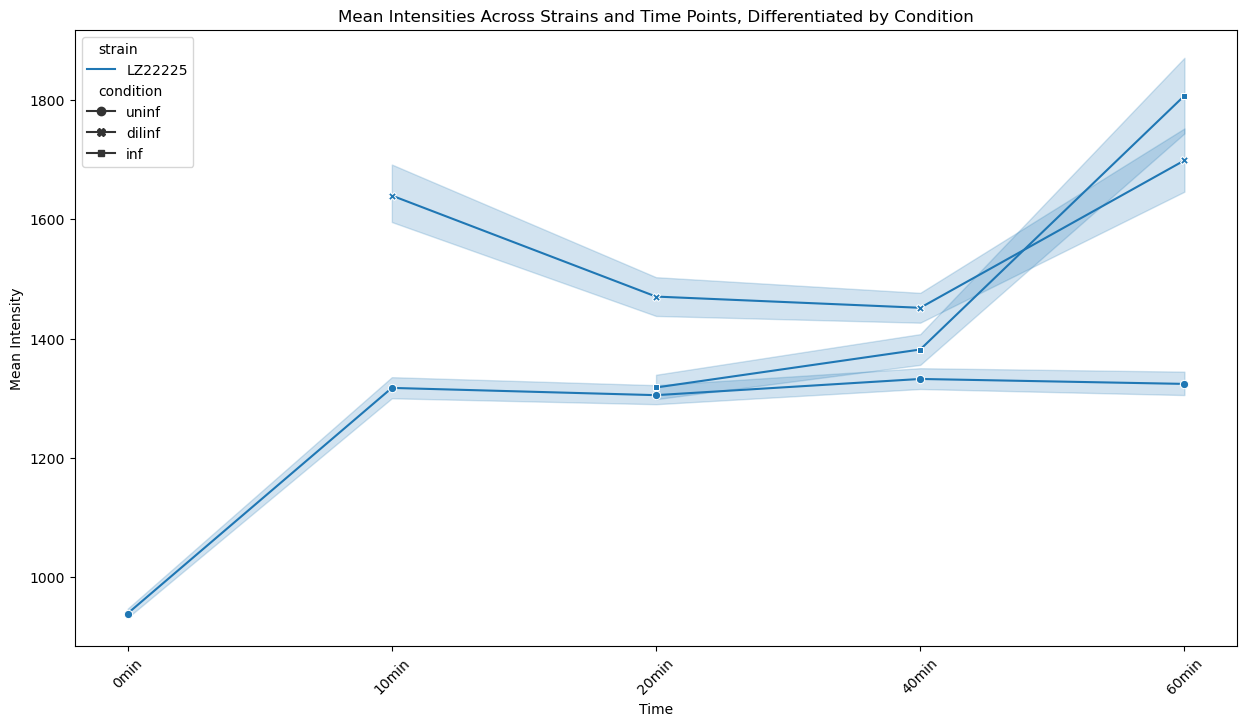

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

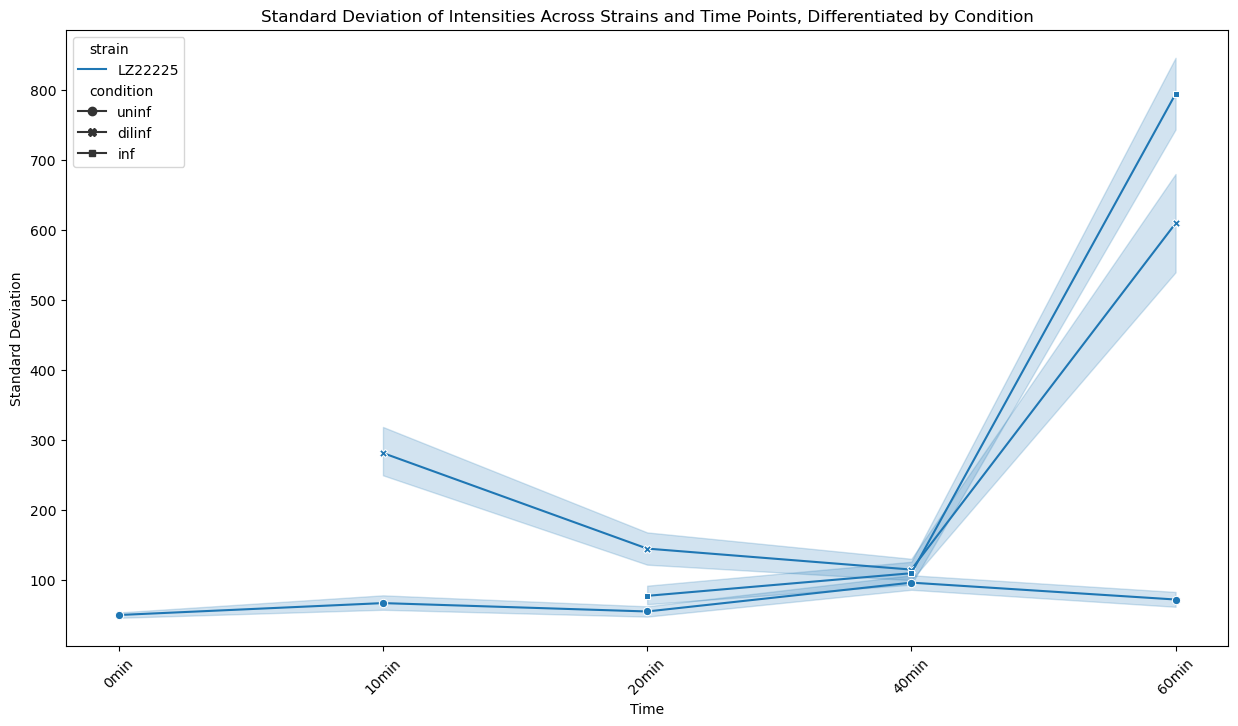

c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nikon\anaconda3\envs\omnipose_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

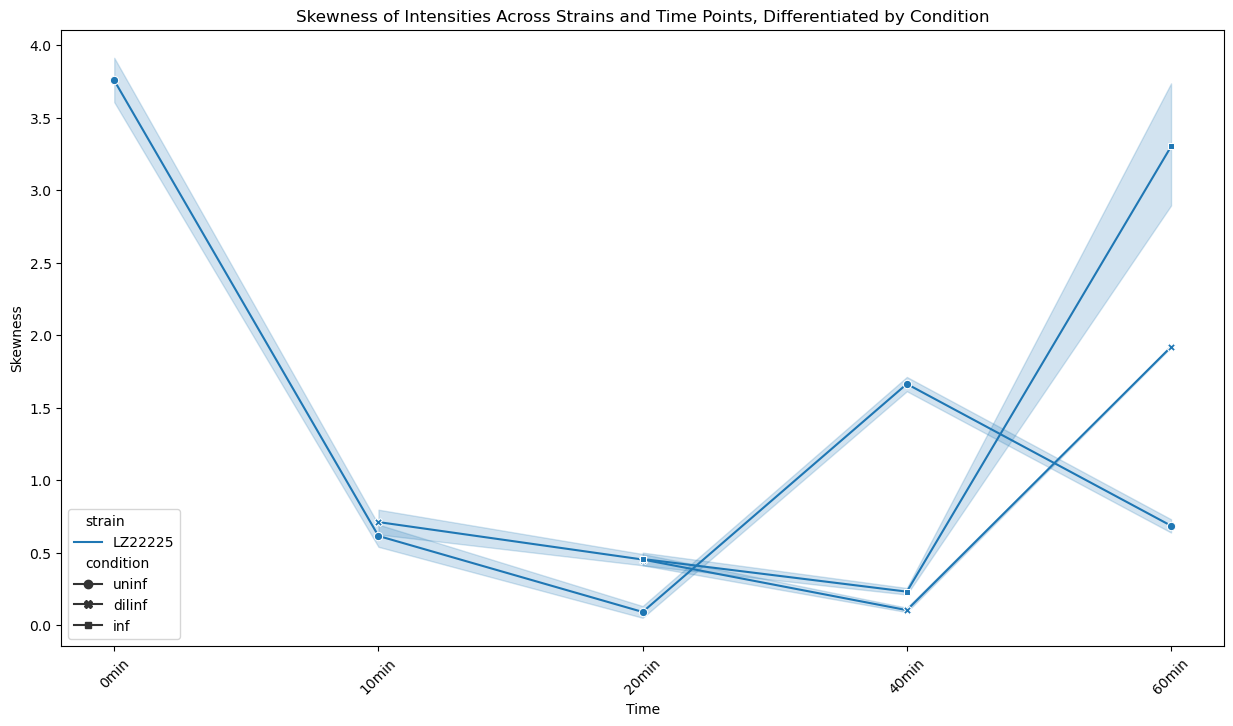

In [ ]:
# Calculating descriptive statistics for key metrics across different groupings


# Grouping and aggregating only the numeric columns
grouped_stats_no_kurtosis = fish_signal_df.groupby(['strain', 'time', 'biorep', 'condition', 'z_stack'])[numeric_columns].agg(['mean', 'median', 'std', 'skew'])

# Focusing on the 'mean' intensity metric
grouped_mean_intensity_stats_no_kurtosis = grouped_stats_no_kurtosis['mean']

# Displaying the descriptive statistics for the mean intensity
grouped_mean_intensity_stats_no_kurtosis.head()

# Exploratory Data Analysis on the descriptive statistics
# We will visualize some of these statistics to look for trends

# Preparing a simpler DataFrame for visualization
eda_df = grouped_mean_intensity_stats_no_kurtosis.reset_index()

# Visualizing Mean Intensities Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='mean', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Mean Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=45)
plt.show()

# Visualizing Standard Deviation Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='std', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Standard Deviation of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()

# Visualizing Skewness Across Strains, Time Points, and Conditions
plt.figure(figsize=(15, 8))
sns.lineplot(data=eda_df, x='time', y='skew', hue='strain', style='condition', markers=True, dashes=False)
plt.title('Skewness of Intensities Across Strains and Time Points, Differentiated by Condition')
plt.xlabel('Time')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Getting the count of unique combinations of the specified columns
unique_combinations_count = fish_signal_df.groupby(['condition', 'strain', 'biorep', 'time', 'image_type']).size().reset_index(name='count')

unique_combinations_count

,condition,strain,biorep,time,image_type,count
0,dilinf,LZ22225,1,10min,background,70
1,dilinf,LZ22225,1,10min,cell,70
2,dilinf,LZ22225,1,20min,background,60
3,dilinf,LZ22225,1,20min,cell,60
4,dilinf,LZ22225,1,40min,background,60
5,dilinf,LZ22225,1,40min,cell,60
6,dilinf,LZ22225,1,60min,background,65
7,dilinf,LZ22225,1,60min,cell,65
8,inf,LZ22225,1,20min,background,60
9,inf,LZ22225,1,20min,cell,60


In [ ]:
#### Analyzing based on differences in mean intensity infected and uninfected


# Filtering for 'inf' and 'uninf' conditions separately
inf_conditions = fish_signal_df[fish_signal_df['condition'] == 'inf']
uninf_conditions = fish_signal_df[fish_signal_df['condition'] == 'uninf']


# Calculating the differences in mean intensities between 'inf' and 'uninf' conditions for the specified combinations

# Calculating mean intensities for each combination in the 'inf' and 'uninf' datasets
mean_inf = inf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_inf')
mean_uninf = uninf_conditions.groupby(['strain', 'biorep', 'time', 'image_type'])['mean'].mean().reset_index(name='mean_uninf')

# Merging the mean intensities for 'inf' and 'uninf' conditions
merged_means = pd.merge(mean_inf, mean_uninf, on=['strain', 'biorep', 'time', 'image_type'])

# Calculating the difference in mean intensities
merged_means['mean_intensity_diff'] = merged_means['mean_inf'] - merged_means['mean_uninf']

# Displaying the results
merged_means[['strain', 'biorep', 'time', 'image_type', 'mean_intensity_diff']]




,strain,biorep,time,image_type,mean_intensity_diff
0,LZ22225,1,20min,background,-2.984583
1,LZ22225,1,20min,cell,28.664336
2,LZ22225,1,40min,background,19.143095
3,LZ22225,1,40min,cell,79.527653
4,LZ22225,1,60min,background,57.912813
5,LZ22225,1,60min,cell,907.834835
